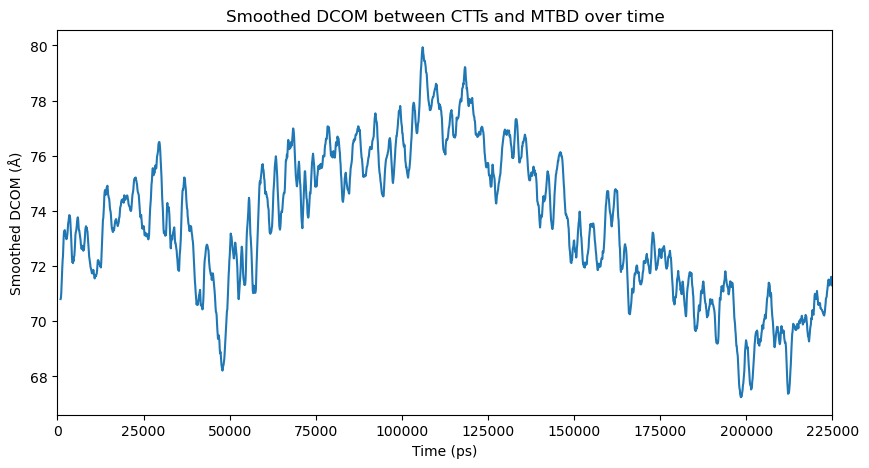

In [46]:
import MDAnalysis as mda
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Universe with Gromacs files
u = mda.Universe('npt_modified_1.gro', 'centered_nojump_md.xtc')

# Select CTTs and MTBD
ctts = u.select_atoms('resid 437-450', 'resid 877-901')
mtbd = u.select_atoms('resid 903-1030')

# Calculate DCOM for each frame
dcom_values = []
for ts in u.trajectory:
    dcom = np.linalg.norm(ctts.center_of_mass() - mtbd.center_of_mass())
    dcom_values.append(dcom)

# Generate the x-values (time)
time = np.arange(len(dcom_values)) * u.trajectory.dt

# Create a DataFrame
df = pd.DataFrame({'Time (ps)': time, 'DCOM (Å)': dcom_values})

# Calculate the rolling average with a window size of 100
df['Smoothed DCOM (Å)'] = df['DCOM (Å)'].rolling(window=10).mean()

# Plot the smoothed DCOM values using seaborn
plt.figure(figsize=[10,5])
sns.lineplot(x='Time (ps)', y='Smoothed DCOM (Å)', data=df)
plt.title('Smoothed DCOM between CTTs and MTBD over time')

# Set the x-axis to start at zero
plt.xlim(0, max(time))

plt.show()


In [30]:
ct_tails = u.select_atoms('resid 419-455')
mtbd = u.select_atoms('resid 3286-3356')

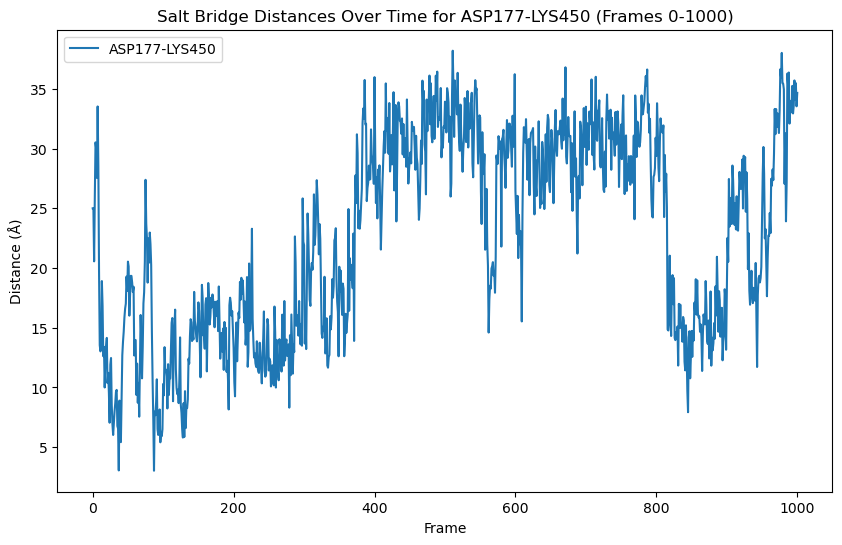

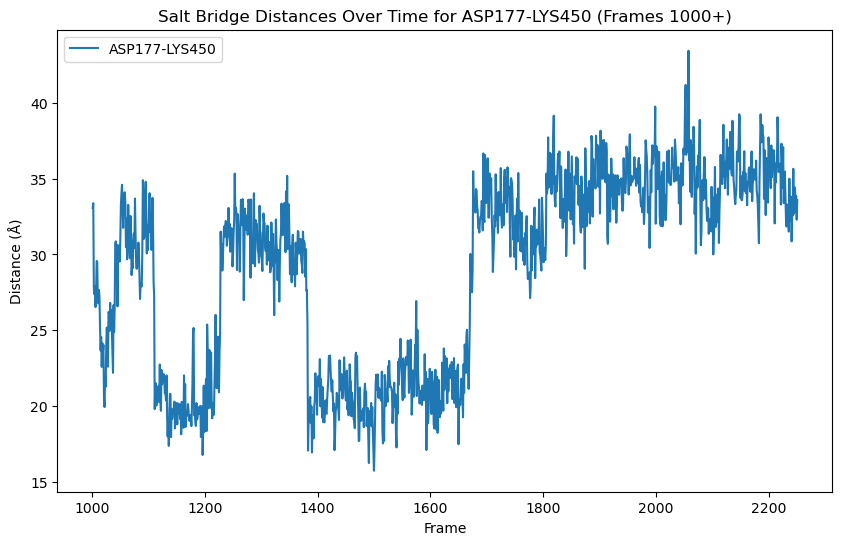

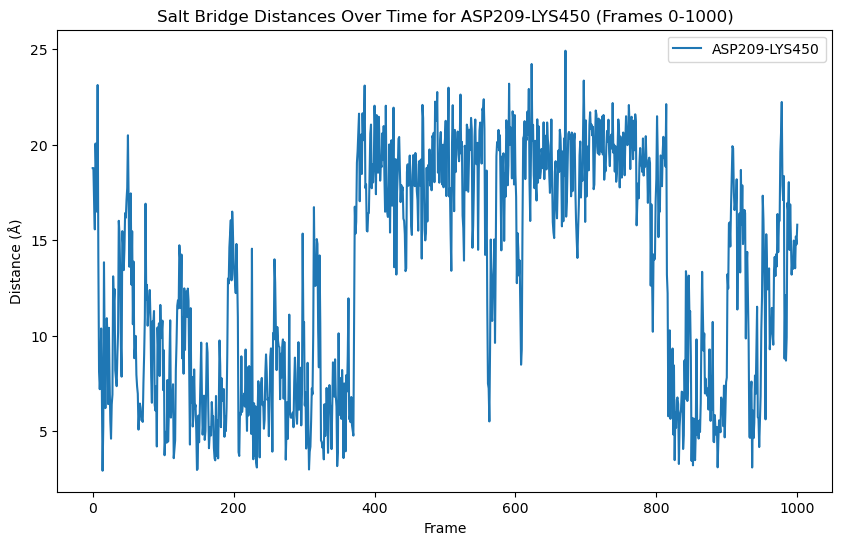

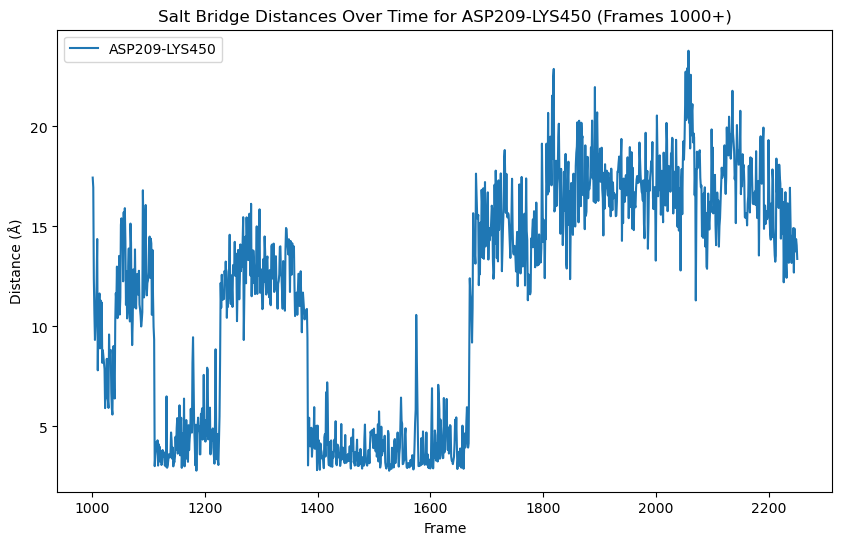

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the .dat file into a pandas DataFrame
data1 = pd.read_csv('saltbr-ASP177_chainX-LYS450_chainX.dat', sep='\s+', header=None)
data2 = pd.read_csv('saltbr-ASP209_chainX-LYS450_chainX.dat', sep='\s+', header=None)

# Break down data into the required frame ranges
data1_first_half = data1[data1[0] <= 1000]
data1_second_half = data1[data1[0] > 1000]

data2_first_half = data2[data2[0] <= 1000]
data2_second_half = data2[data2[0] > 1000]

# Create plots
for data, label, title in [(data1_first_half, 'ASP177-LYS450', 'Frames 0-1000'),
                           (data1_second_half, 'ASP177-LYS450', 'Frames 1000+'),
                           (data2_first_half, 'ASP209-LYS450', 'Frames 0-1000'),
                           (data2_second_half, 'ASP209-LYS450', 'Frames 1000+')]:
    plt.figure(figsize=(10, 6))
    plt.plot(data[0], data[1], label=label)
    plt.xlabel('Frame')  # Set the x-axis label
    plt.ylabel('Distance (Å)')  # Set the y-axis label
    plt.title(f'Salt Bridge Distances Over Time for {label} ({title})')  # Set the title of the plot
    plt.legend()  # Display the legend
    plt.show()  # Display the plot


In [37]:
import MDAnalysis as mda
import numpy as np

# Initialize Universe with Gromacs files
u = mda.Universe('npt_modified.gro', 'centered_nojump_md.xtc')

# Select CTT tails and MTBD
ct_tails = u.select_atoms('resid 419-455')
mtbd = u.select_atoms('resid 3286-3356')

# Select basic and acidic atoms in the two selections
basic = ct_tails.select_atoms('name NH* NZ NE*')
acidic = mtbd.select_atoms('name OD* OE*')

# Calculate the distances between all pairs of basic and acidic atoms
distances = np.linalg.norm(basic.positions[:, np.newaxis] - acidic.positions, axis=2)

# Check if any distances are below the threshold
salt_bridges = distances < 4.0

# Print the result
if np.any(salt_bridges):
    print('Salt bridges found')
else:
    print('No salt bridges found')


No salt bridges found
